In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('RICE.csv')

In [3]:
df

,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location
0,2003,1,0.0,Number/hill,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,Brownplanthopper,Cuttack
1,2003,2,0.0,Number/hill,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,Brownplanthopper,Cuttack
2,2003,3,0.0,Number/hill,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,Brownplanthopper,Cuttack
3,2003,4,0.0,Number/hill,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,Brownplanthopper,Cuttack
4,2003,5,0.0,Number/hill,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,Brownplanthopper,Cuttack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19399,2011,48,31.0,Number/Light trap,30.2,17.2,78.1,41.6,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar
19400,2011,49,38.0,Number/Light trap,30.5,12.9,84.3,33.4,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar
19401,2011,50,6.0,Number/Light trap,30.2,14.2,83.4,49.6,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar
19402,2011,51,13.0,Number/Light trap,29.0,11.8,81.9,49.3,0.0,0.0,0.0,0.0,Yellowstemborer,Rajendranagar


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19404 entries, 0 to 19403
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Observation Year  19404 non-null  int64  
 1   Standard Week     19404 non-null  int64  
 2   Pest Value        19404 non-null  float64
 3   Collection Type   19404 non-null  object 
 4   MaxT              19404 non-null  float64
 5   MinT              19404 non-null  float64
 6   RH1(%)            19404 non-null  float64
 7   RH2(%)            19404 non-null  float64
 8   RF(mm)            19404 non-null  float64
 9   WS(kmph)          19404 non-null  float64
 10  SSH(hrs)          19404 non-null  float64
 11  EVP(mm)           19404 non-null  float64
 12  PEST NAME         19404 non-null  object 
 13  Location          19404 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.1+ MB


In [5]:
df.isnull().sum()

Observation Year    0
Standard Week       0
Pest Value          0
Collection Type     0
MaxT                0
MinT                0
RH1(%)              0
RH2(%)              0
RF(mm)              0
WS(kmph)            0
SSH(hrs)            0
EVP(mm)             0
PEST NAME           0
Location            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
for column in df.columns:
    print("Unique columns:",column)
    print(df[column].unique())
    print()

Unique columns: Observation Year
[2003 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1973 1974
 1975 2001 2002 2007 1996 2010 1995 1997 1998 1999 2000 2008 2009 2011
 1994 2004 2005 2006 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1976 1977 1978 1979 1980 1981]

Unique columns: Standard Week
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]

Unique columns: Pest Value
[   0.     2.9    9.7 ... 1121.   381.   498. ]

Unique columns: Collection Type
['Number/hill' 'Number/Light trap' 'Percent Damage'
 'Number/Pheromone trap' 'Percentage']

Unique columns: MaxT
[27.9 27.2 28.7 25.3 28.8 27.1 30.7 30.4 31.1 31.7 34.  32.1 32.9 35.1
 35.8 36.4 35.  34.5 35.4 37.6 41.1 38.8 35.5 31.  33.  34.8 31.9 31.4
 31.6 31.5 28.9 32.3 32.7 29.1 30.5 29.3 29.8 29.  27.7 27.3 26.8 29.9
 29.4 26.1 32.6 33.5 35.3 36.8 36.7 35.9 39.  39.4 37.9 41.  38.6 35.7
 34.9 31.8 32.  30.6 32.2

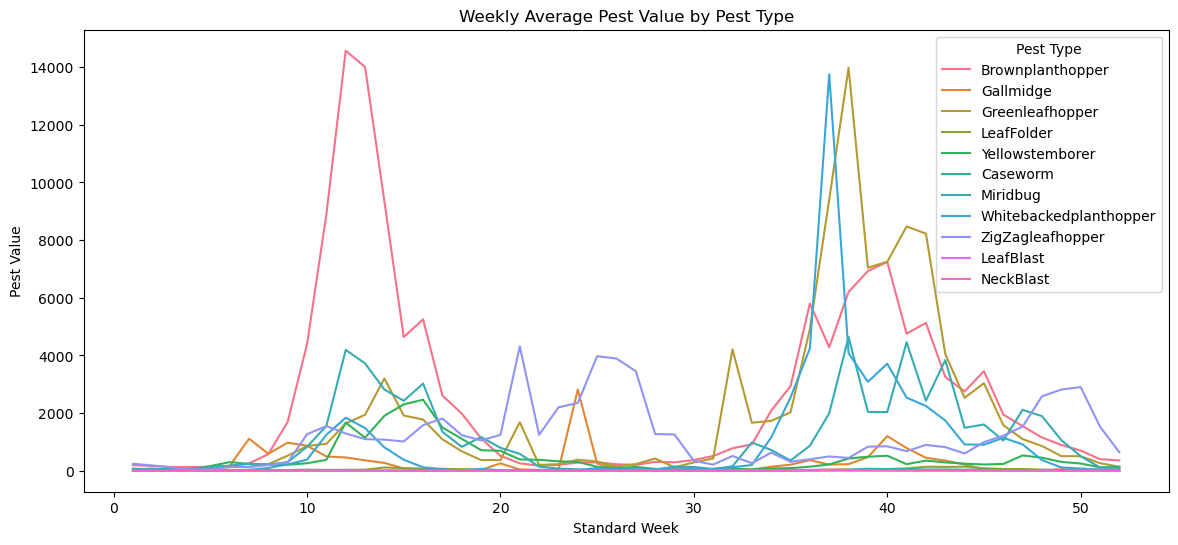

In [8]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x="Standard Week", y="Pest Value", hue="PEST NAME", estimator="mean", ci=None)
plt.title("Weekly Average Pest Value by Pest Type")
plt.xlabel("Standard Week")
plt.ylabel("Pest Value")
plt.legend(title="Pest Type")
plt.show()

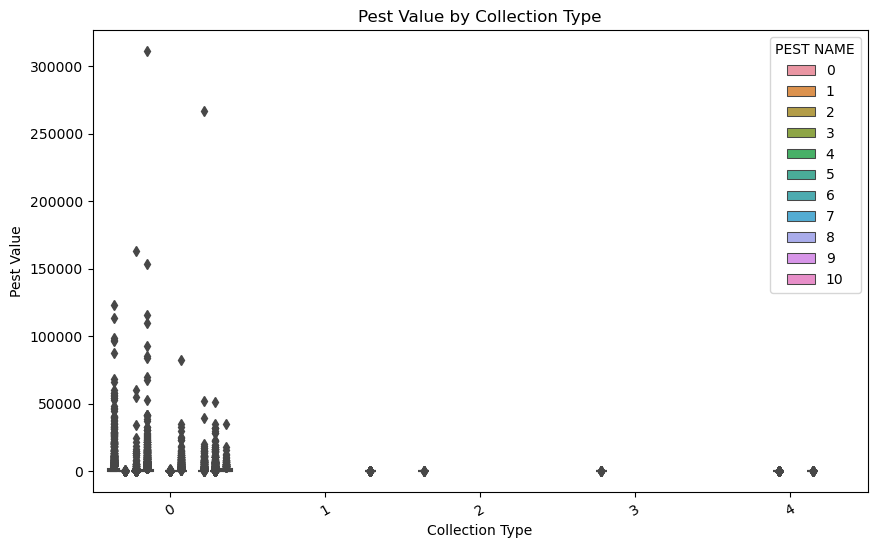

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Collection Type", y="Pest Value", hue="PEST NAME")
plt.xticks(rotation=30)
plt.title("Pest Value by Collection Type")
plt.show()

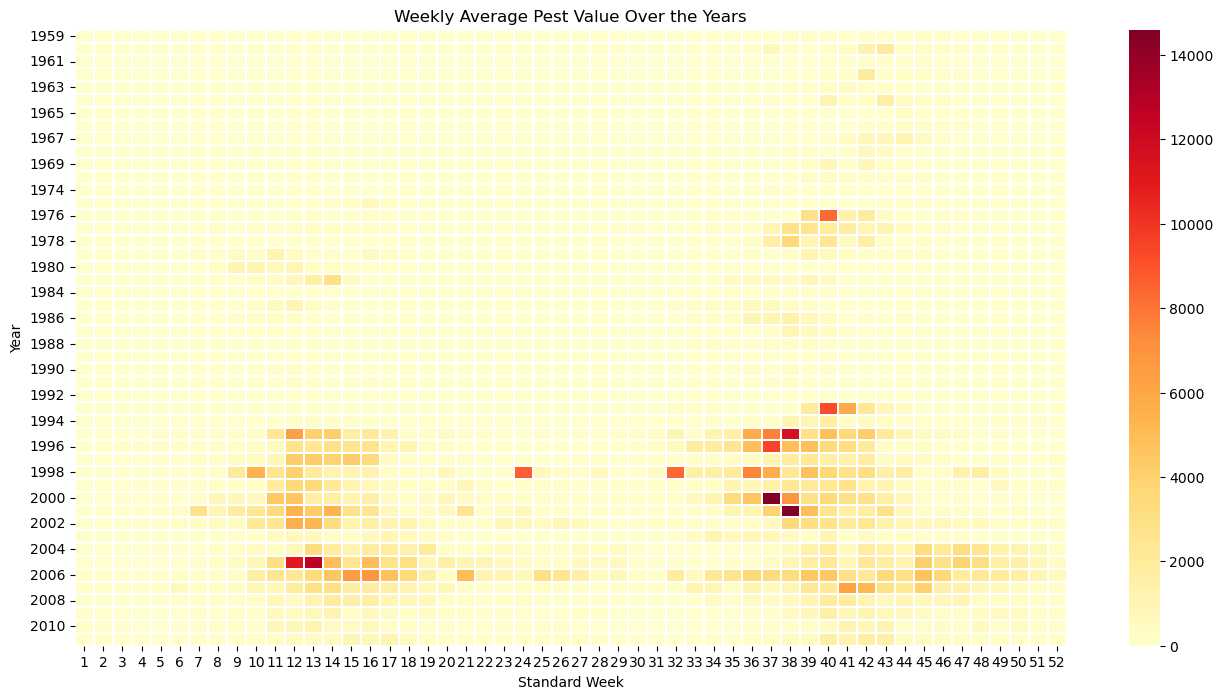

In [34]:
pivot_table = df.pivot_table(values='Pest Value', index='Observation Year', columns='Standard Week', aggfunc='mean')
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', linecolor='white', linewidths=0.1)
plt.title('Weekly Average Pest Value Over the Years')
plt.xlabel('Standard Week')
plt.ylabel('Year')
plt.show()

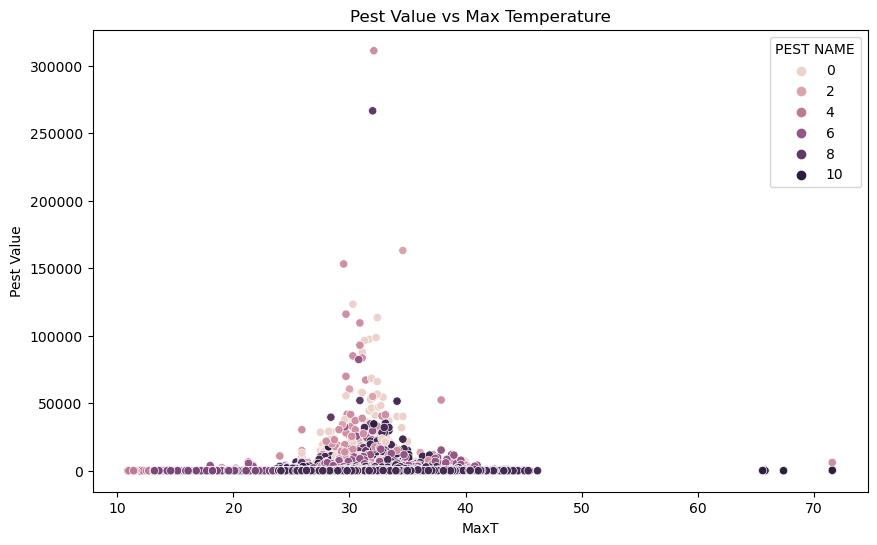

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MaxT', y='Pest Value', hue='PEST NAME')
plt.title("Pest Value vs Max Temperature")
plt.show()

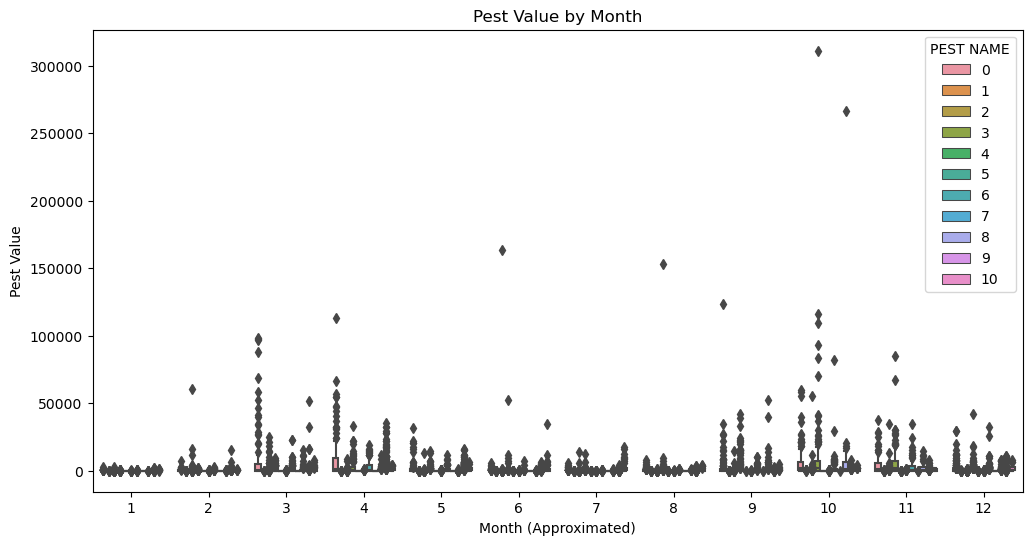

In [36]:
df['Month'] = ((df['Standard Week'] - 1) // 4 + 1).clip(upper=12)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Pest Value', hue='PEST NAME')
plt.title("Pest Value by Month")
plt.xlabel("Month (Approximated)")
plt.show()

# Pivot Tables

In [23]:
pivot_avg_pest_value = df.pivot_table(
    index='Observation Year',
    columns='Standard Week',
    values='Pest Value',
    aggfunc='mean'
)
print(pivot_avg_pest_value)

Standard Week             1           2           3           4           5   \
Observation Year                                                               
1959                1.000000    0.000000    0.000000    0.000000    0.000000   
1960                0.000000    0.000000    0.000000    0.000000    0.000000   
1961                0.000000    0.000000    0.000000    0.000000    0.000000   
1962                0.000000    0.000000    0.000000    0.000000    0.000000   
1963                0.000000    0.000000    0.000000    0.000000    0.000000   
1964                0.000000    0.000000    0.000000    0.000000    0.000000   
1965                0.000000    0.000000    0.000000    0.000000    0.000000   
1966                0.000000    0.000000    0.000000    0.000000    0.000000   
1967                0.000000    0.000000    0.000000    0.000000    0.000000   
1968                0.000000    0.000000    0.000000    0.000000    0.000000   
1969                0.000000    0.000000

In [26]:
pivot_max_temp = df.pivot_table(
    index='Observation Year',
    columns='Standard Week',
    values='MaxT',
    aggfunc='mean'
)
print(pivot_max_temp)

Standard Week            1          2          3          4          5   \
Observation Year                                                          
1959              26.800000  29.900000  29.400000  26.100000  27.200000   
1960              27.100000  27.300000  26.900000  26.700000  29.200000   
1961              24.100000  26.700000  27.800000  29.000000  27.700000   
1962              26.000000  27.000000  26.100000  28.000000  26.000000   
1963              26.200000  27.500000  27.000000  26.400000  27.800000   
1964              29.300000  30.700000  28.200000  30.600000  26.100000   
1965              27.400000  27.700000  28.400000  28.100000  30.500000   
1966              24.500000  25.400000  26.400000  28.800000  28.200000   
1967              26.200000  21.400000  26.600000  28.000000  28.200000   
1968              29.400000  28.000000  24.800000  27.500000  28.500000   
1969              28.100000  28.800000  26.700000  28.300000  30.800000   
1973              26.2000

In [27]:
pivot_total_rainfall = df.pivot_table(
    index='Observation Year',
    columns='Standard Week',
    values='RF(mm)',
    aggfunc='sum'
)
print(pivot_total_rainfall)

Standard Week        1      2      3      4      5      6      7      8   \
Observation Year                                                           
1959                0.0    0.0   16.8    6.9    0.0    0.5   13.4    0.0   
1960                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1961               38.3    0.0    0.0    0.0    0.0    3.8    0.0    0.3   
1962                0.0    0.0    0.0    8.9    0.0    3.8    0.0    0.3   
1963                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1964                0.0    0.0    2.1    0.0   24.6    1.4    0.0    0.0   
1965                1.4    0.0    0.0    0.0    0.0    4.4    0.0    4.0   
1966               84.4    1.6    0.0    0.0    0.0    0.0   33.5    0.0   
1967               25.0   50.6    0.0    0.0    0.0    0.0    0.0    0.0   
1968                0.0   18.2    0.8    0.0    0.0    0.0    6.8   45.5   
1969                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1973        

In [28]:
pivot_pest_by_location = df.pivot_table(
    index='PEST NAME',
    columns='Location',
    values='Pest Value',
    aggfunc='mean'
)
print(pivot_pest_by_location)

Location             0            1            2         3           4  \
PEST NAME                                                                
0             1.115385   329.993590  5047.733115       NaN   21.557692   
1                  NaN     4.076923    12.993590       NaN   33.525641   
2            36.929988     1.500000   711.544118       NaN   48.648077   
3          4671.769231  1126.480769  2966.008424       NaN  365.264423   
4                  NaN          NaN          NaN  3.965394         NaN   
5            39.365385    13.076923    50.231900       NaN    2.307692   
6                  NaN  3394.038462   893.885897       NaN   21.653846   
7                  NaN          NaN          NaN  0.245769         NaN   
8                  NaN    22.796154  1367.436652       NaN  135.326923   
9            82.102564    27.378698  1679.887821       NaN  110.560897   
10                 NaN          NaN  1192.809829       NaN         NaN   

Location             5  
PEST NAME   

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
label_cols = ['Collection Type', 'PEST NAME', 'Location']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

In [38]:
X = df.drop(['Pest Value'], axis=1)
y = df['Pest Value']

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# KNN

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nKNN Regressor:")
print("R² Score:", r2_score(y_test, y_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))



KNN Regressor:
R² Score: 0.22510928070899516
MAE: 805.4151352744138
MSE: 9466266.751033066


# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("\nLinear Regression:")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression:
R² Score: 0.02922538072841574
MAE: 1256.0807508348457
MSE: 11859235.466861084


# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Regressor:")
print("R² Score:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))


Decision Tree Regressor:
R² Score: -3.3623272554134314
MAE: 976.0800618397319
MSE: 53291325.37918222


# Random forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Regressor:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))


Random Forest Regressor:
R² Score: 0.4218462841964483
MAE: 821.1545391393971
MSE: 7062876.300680084


# Ada Boost

In [21]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("\nAdaBoost Regressor:")
print("R² Score:", r2_score(y_test, y_pred_ada))
print("MAE:", mean_absolute_error(y_test, y_pred_ada))
print("MSE:", mean_squared_error(y_test, y_pred_ada))


AdaBoost Regressor:
R² Score: -1.1305563305215376
MAE: 3025.9735677814924
MSE: 26027430.772783507


# Gradient Boost

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("\nGradient Boosting Regressor:")
print("R² Score:", r2_score(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))



Gradient Boosting Regressor:
R² Score: 0.1737640172266709
MAE: 1114.40358916698
MSE: 10093513.856238395


# Observation

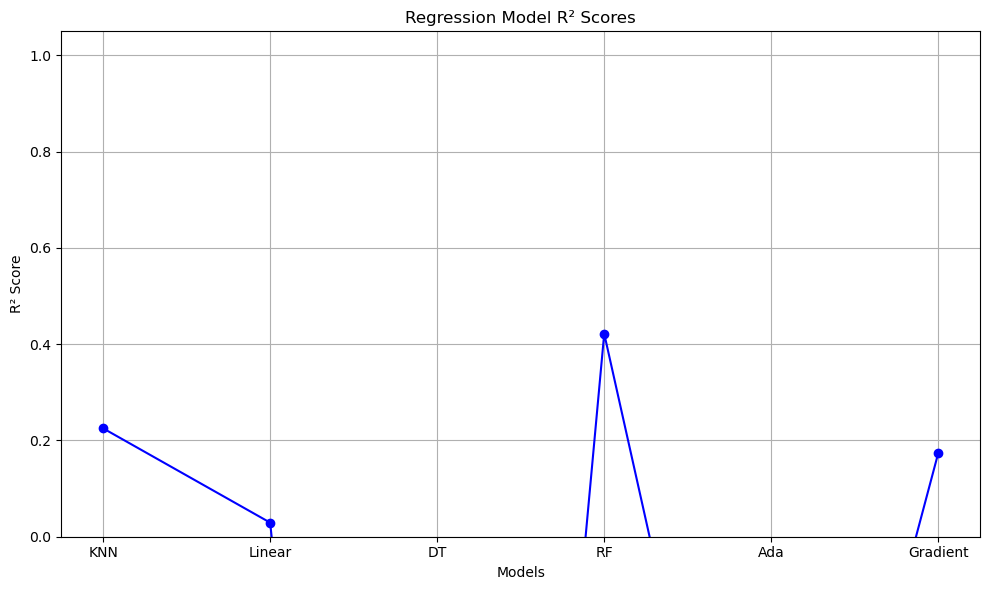

In [29]:
models = ['KNN', 'Linear',  'DT', 'RF', 'Ada', 'Gradient']
r2_scores = [
    r2_score(y_test, y_pred_knn),         
    r2_score(y_test, y_pred_lr),                  
    r2_score(y_test, y_pred_dt),         
    r2_score(y_test, y_pred_rf),          
    r2_score(y_test, y_pred_ada),     
    r2_score(y_test, y_pred_gb),          
]
plt.figure(figsize=(10, 6))
plt.plot(models, r2_scores, marker='o', linestyle='-', color='b')
plt.title('Regression Model R² Scores')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.ylim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()
